### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data Inserting

In [3]:
data=pd.read_csv("house_prices.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### Fill The Missing Values in Data


In [6]:
#drops the row which has  null values in the Sale price column

data.dropna(inplace=True,axis=0,subset=['Sale Price']) 

#sale price is a dependent variable

In [7]:
#Here we observe missing values in these columns

numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                   'Area of the House from Basement (in Sqft)','Latitude',	'Longitude',
                   	'Living Area after Renovation (in Sqft)']

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median') #here we fills the nan/ empty data with median
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [9]:
#to fill zipcode null value

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[["Zipcode"]]=imputer.fit_transform(data[['Zipcode']])
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


Here we fills the zipcode with the most frequent value

----------------------------

### Data Exploration

In [10]:
# lets make Zipcode Categotical since no relation with target variable


data['Zipcode']=data['Zipcode'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [11]:
# Here we converted No of times visited 

#Label Encoding

mapping={'None' : "0",
         'Once' :'1',
         "Twice": '2',
         "Thrice":'3',
         'Four':'4'

          }

data['No of Times Visited']=data['No of Times Visited'].map(mapping)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [13]:
# Here we create Ever Renovated column to check the house is renovated or not

data['Ever Renovated']=np.where(data['Renovated Year']==0,"No",'Yes')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [14]:
#create the Year of house sold from  Date House was Sold

data['Year of Purchased']=pd.DatetimeIndex(data['Date House was Sold']).year
data['Year of Purchased']

0        2017
1        2017
2        2016
3        2017
4        2016
         ... 
21608    2017
21609    2016
21610    2017
21611    2016
21612    2017
Name: Year of Purchased, Length: 21609, dtype: int64

In [15]:
#creating years since Renovation


data['years since renovation']=np.where(data['Ever Renovated']=='Yes', abs(data['Year of Purchased']-data['Renovated Year']),0)


data['years since renovation']

#from this we this observe the years of renovation 

0         0
1        26
2         0
3         0
4         0
         ..
21608     0
21609     0
21610     0
21611     0
21612     0
Name: years since renovation, Length: 21609, dtype: int64

In [16]:
#here we remove unnecessary columns

data.drop(columns=['Year of Purchased','Renovated Year','Date House was Sold'],inplace=True)

data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,years since renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


### Studying categorical Variables

In [17]:
#Libraries for ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm


In [18]:
# rename  categorical columns name which has the space

data=data.rename(columns={'Sale Price':'Sale_Price','Condition of the House':'Condition_of_house','Ever Renovated':'Ever_renovated','Waterfront View':'Waterfront_view'})
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_house,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_renovated,years since renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


### Creating Dummies for Categorical Variables

In [19]:
data=pd.get_dummies(data,columns=['Condition_of_house'],drop_first=True)
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_renovated,years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [20]:
data=pd.get_dummies(data,columns=['Ever_renovated','Waterfront_view'],drop_first=True)
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay,Ever_renovated_Yes,Waterfront_view_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


### Binning

In [21]:

#creating zip_table

zip_table=data.groupby('Zipcode').agg({'Sale_Price':"mean"}).sort_values('Sale_Price',ascending=True)
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [22]:
zip_table['Zipcode_Group']= pd.cut(zip_table['Sale_Price'], bins = 10,
                                    labels = ['Zipcode_Group_0',
                                              'Zipcode_Group_1',
                                              'Zipcode_Group_2',
                                              'Zipcode_Group_3',
                                              'Zipcode_Group_4',
                                              'Zipcode_Group_5',
                                              'Zipcode_Group_6',
                                              'Zipcode_Group_7', 
                                              'Zipcode_Group_8',
                                              'Zipcode_Group_9'
                                             ],
                                    include_lowest = True)

In [23]:
zip_table=zip_table.drop(columns='Sale_Price')
zip_table.head()

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0


### Merging tables


In [24]:
data=pd.merge(data,zip_table,
            left_on='Zipcode',
            how='left',
            right_index=True)
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay,Ever_renovated_Yes,Waterfront_view_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_1
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_1
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_1
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_2


In [25]:
data=data.drop(columns='Zipcode')

#VCreating dummies for Zipcode_group


data=pd.get_dummies(data,columns=['Zipcode_Group'],drop_first=True)

In [26]:
data=data.drop(columns='ID')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,0,0


### Scaling Dataset

In [27]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

Y=data['Sale_Price']   #HERE WE ASIGN DEPENDENT VARIABLE TO Y
X=scaler.fit_transform(data.drop(columns=['Sale_Price']))    #HERE WE TAKE REMAINING COLUMNS AND DROP THE SALE_PRICE COLUMN
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.656768,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,1.522608,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,1.522608,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,1.522608,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.656768,2.005163,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158


### Checking Correlation

In [28]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.051134,0.059463,0.050826,0.070309,0.063524,NaN,NaN,NaN,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,0.000427,0.110186,0.073092,0.091225,0.065422,NaN,NaN,NaN,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.037158,0.154372,0.093180,0.128602,0.110168,NaN,NaN,NaN,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.025141,-0.001384,-0.038811,-0.022104,-0.005898,NaN,NaN,NaN,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,0.088577,0.044297,0.053827,0.047409,-0.014021,NaN,NaN,NaN,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,0.017363,0.013966,0.079741,0.050518,0.011407,NaN,NaN,NaN,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.015160,0.209996,0.127301,0.143523,0.097266,NaN,NaN,NaN,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.036596,0.156645,0.044753,0.089327,0.093068,NaN,NaN,NaN,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.008482,0.026782,0.109646,0.099749,0.054498,NaN,NaN,NaN,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,0.012003,-0.054754,0.087540,0.070055,-0.001951,NaN,NaN,NaN,-0.002492


In [29]:
# pair of independent variables with correlation 0.5
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j  in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]


z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

### Removing Multicolinearity

#### Calculating VIF

In [30]:
## importing Variance_Inflation_Factor  function from Statsmodel


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X

#calculating VIF for every  column

VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index=vif_data.columns)
VIF

No of Bedrooms                                  1.633516
No of Bathrooms                                 3.368315
Flat Area (in Sqft)                          1481.641158
Lot Area (in Sqft)                              2.107018
No of Floors                                    2.083232
No of Times Visited                             1.426376
Overall Grade                                   2.924996
Area of the House from Basement (in Sqft)    1205.487280
Basement Area (in Sqft)                       345.465204
Age of House (in Years)                         2.552404
Latitude                                        1.834876
Longitude                                       1.583628
Living Area after Renovation (in Sqft)          3.051092
Lot Area after Renovation (in Sqft)             2.138776
years since renovation                          2.787087
Condition_of_house_Excellent                   53.566625
Condition_of_house_Fair                       166.101704
Condition_of_house_Good        

In [31]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [32]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index=vif_data.columns)
    if vif.max() > 5:
        print(vif[vif==vif.max()].index[0],'has removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No More multicollinearity")
        return data 



In [33]:
for i in range(7):
    vif_data=MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has removed
Condition_of_house_Fair has removed
No More multicollinearity
No More multicollinearity
No More multicollinearity
No More multicollinearity
No More multicollinearity


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.656768,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,1.522608,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,1.522608,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,1.522608,-0.498713,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.656768,2.005163,-0.234352,-0.161759,-0.122017,0.0,0.0,0.0,-0.048158


In [34]:
#calculating VIF for remaining columns

VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                               1.633017
 No of Bathrooms                              3.367128
 Lot Area (in Sqft)                           2.106459
 No of Floors                                 2.083132
 No of Times Visited                          1.426356
 Overall Grade                                2.915085
 Area of the House from Basement (in Sqft)    4.564600
 Basement Area (in Sqft)                      1.975765
 Age of House (in Years)                      2.549182
 Latitude                                     1.834766
 Longitude                                    1.583620
 Living Area after Renovation (in Sqft)       3.046777
 Lot Area after Renovation (in Sqft)          2.138479
 years since renovation                       2.787051
 Condition_of_house_Excellent                 1.202415
 Condition_of_house_Good                      1.245501
 Condition_of_house_Okay                      1.024695
 Ever_renovated_Yes                           2.952637
 Waterfron

## Train/Test Dataset

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X=vif_data
y=data['Sale_Price']   #target Variable

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)



x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

### Linear Regression Model 

In [38]:
from sklearn.linear_model import LinearRegression


In [39]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [40]:
lr.coef_ #coeeficients of independent variables 

array([-32731.01812454,  26611.79444929,  13326.75537844,    265.21666226,
        46558.85525084,  29592.47638717, 182325.66920041,  69927.83793296,
        34503.90435794,  41319.13635494, -29581.28489852,   3309.99234282,
        -9311.86130782, -18452.97257995,  16676.97384353,   6147.18335929,
         -313.0540118 ,  21737.67527015,  54509.65650224,  45738.61362739,
        65291.29502073,  62146.59069375,  74648.21367217,  86651.38568759,
            0.        ,      0.        ,      0.        ,  57605.74523785])

In [41]:
prediction=lr.predict(x_test)
lr.score(x_test,y_test)


0.7672678947332504

# Verifying Assumptions of Linear Regression

#### 1.Residuals

In [42]:
residuals=prediction-y_test   #residual=prediction - actual
 
residual_table=pd.DataFrame({'Residuals':residuals,
                            'Predictions':prediction})
residual_table=residual_table.sort_values(by ='Predictions')


In [43]:
z=[i for i in range(int(residual_table['Predictions'].max()))]
k=[0 for i in range(int(residual_table['Predictions'].max()))]


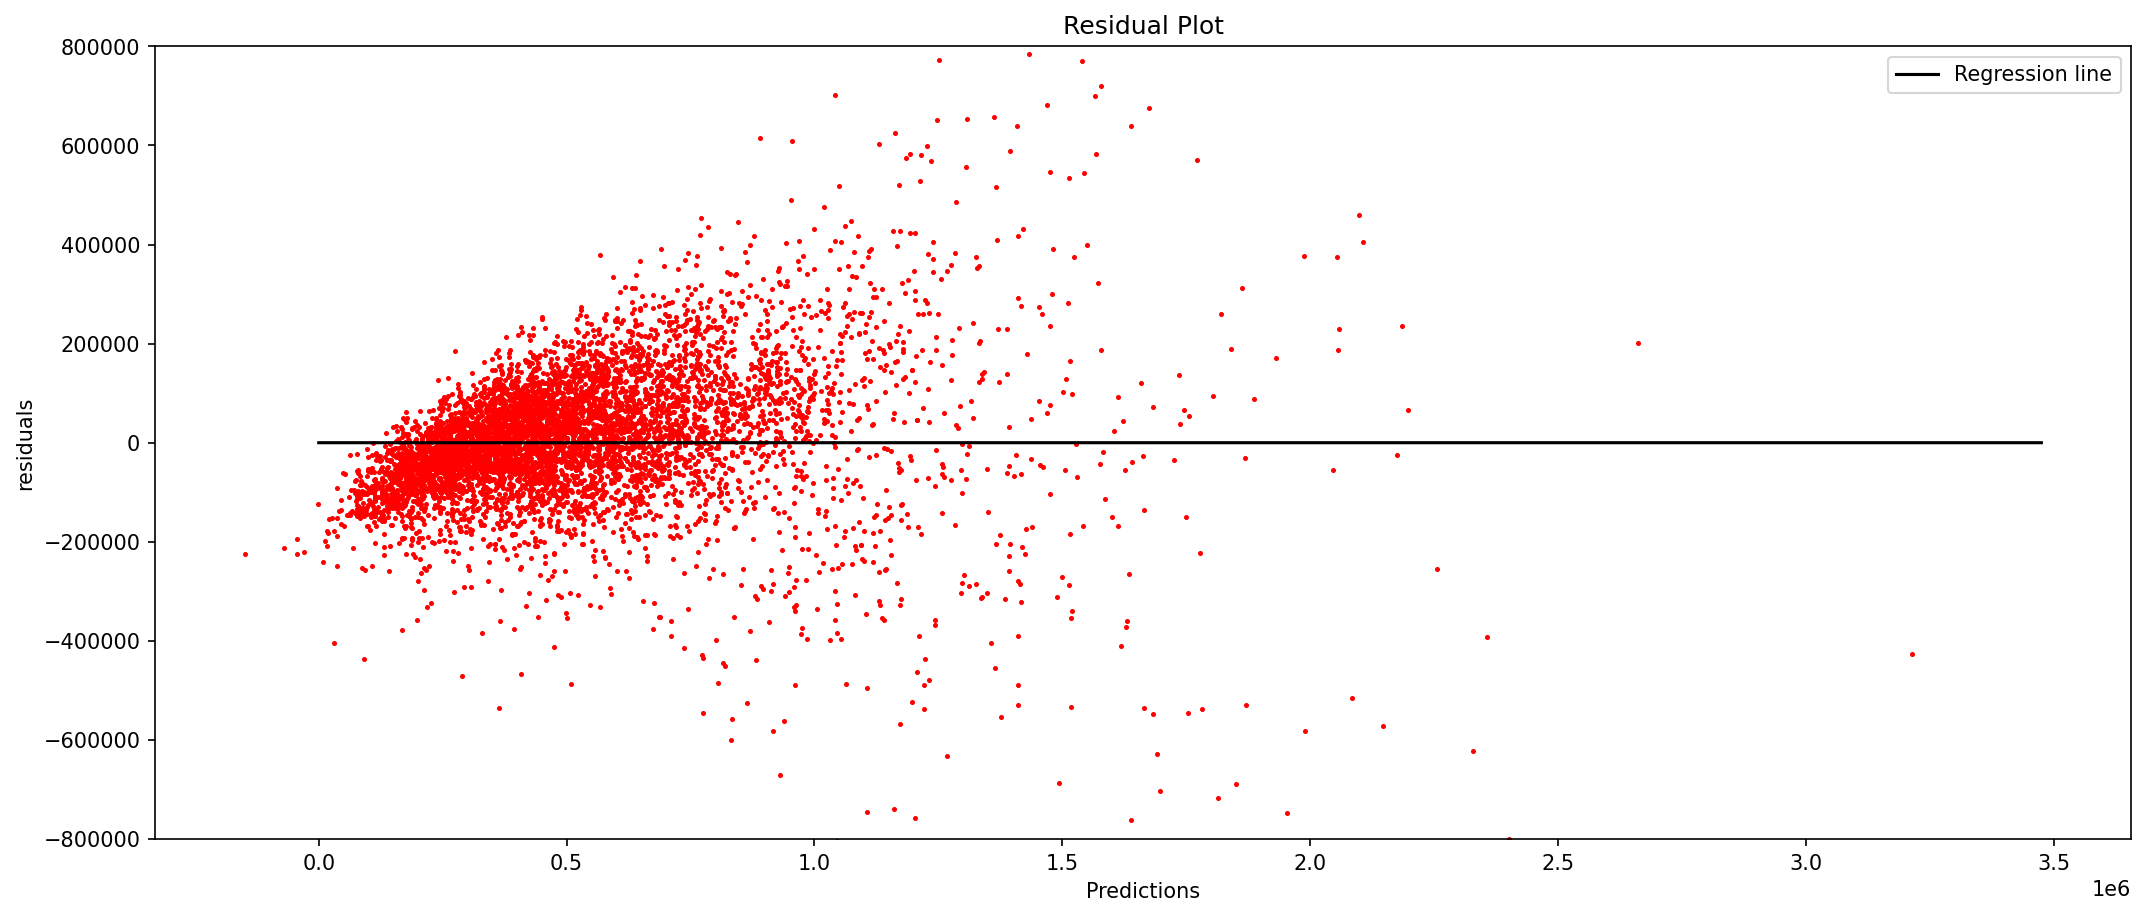

In [44]:
#plotting residual Plot

plt.figure(dpi=150,figsize=(17,7))
plt.scatter(residual_table['Predictions'],residual_table['Residuals'],color='red',s=2)
plt.plot(z,k,color='black',label='Regression line')
plt.ylim(-800000,800000)
plt.xlabel('Predictions')
plt.ylabel('residuals')
plt.title("Residual Plot")
plt.legend()
plt.show()

#### 2. Distribution of Errors

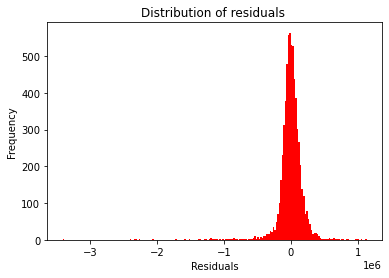

In [45]:
plt.Figure(dpi=150,figsize=(17,7))

plt.hist(residual_table['Residuals'],color='red',bins=200)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title("Distribution of residuals ")
plt.show()

### Model Coefficients

In [46]:
coefficient_table=pd.Series({'Column':x_train.columns,
                            'Coefficient':lr.coef_})

coefficient_table.sort_values 

<bound method Series.sort_values of Column         Index(['No of Bedrooms', 'No of Bathrooms', 'L...
Coefficient    [-32731.018124540828, 26611.79444929235, 13326...
dtype: object>

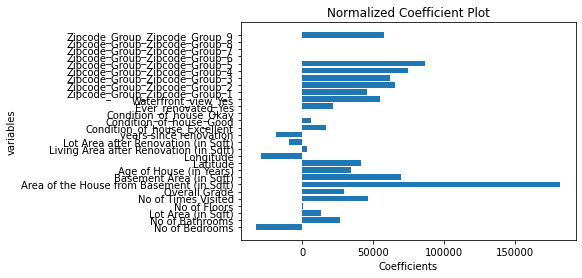

In [47]:
plt.Figure(dpi=120,figsize=(8,6))

x=coefficient_table['Column']
y=coefficient_table['Coefficient']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Normalized Coefficient Plot")
plt.show()

In [48]:
data.isnull().sum()

Sale_Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
No of Times Visited                          0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
years since renovation                       0
Condition_of_house_Excellent                 0
Condition_of_house_Fair                      0
Condition_of_house_Good                      0
Condition_of_house_Okay                      0
Ever_renovated_Yes                           0
Waterfront_vi